 # Introduction
 We are using Machine learning technique to determine the chances for getting heart diseaseU with features like age, bp and so forth.

In [13]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [14]:
#import file
df = pd.read_csv(r'C:\Users\alext\Desktop\kidney_disease.csv')

# data frame info
print(df.shape)
# print(df.info())
print(df.columns) 
# df['bp'].unique()  # check bp categorical features


(400, 26)
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [15]:
df = df.drop(['id'], axis=1)

In [16]:
# check distinct value
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [17]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [18]:
catColumns = ['rc','dm','cad','pcv','wc','classification']

for i in catColumns:
    df[i] = df[i].str.replace('\t','')

In [19]:
numColumns = ['rc','dm','cad','pcv','wc']

for i in numColumns:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

In [20]:
# checking null value
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [34]:
# filling na numerical value with forward filling
df = df.fillna(method="ffill",limit=1)
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df = imputer.fit_transform(df)

df = pd.DataFrame(df, columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'])

# select numeric columns
# numeric_columns = df.select_dtypes(include=['number']).columns
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(df[numeric_columns])
# imputer.transform(df[numeric_columns])

# for column in df:
    
#     df[i] = pd.to_numeric(df[i])
#     df[i].fillna((df[i].mean()), inplace=True)

    # df[i] = df[i].fillna(value = (df[i].mean()), inplace = True)
    # df[i].replace(' ', np.mean(pd.to_numeric(df[i], errors='coerce')))
print(df)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0   1.02  1.0  0.0  normal    normal  notpresent  notpresent   
1     7.0  50.0   1.02  4.0  0.0  normal    normal  notpresent  notpresent   
2    62.0  80.0   1.01  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0   1.01  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0   1.02  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0   1.02  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ... pcv    wc   rc  htn   dm cad appet   pe  ane cl

In [22]:
df.groupby('classification').mean()

c:\Users\alext\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,
ckd,54.608000,79.16,1.014060,1.684,0.708,170.808000,71.7728,4.3306,134.038000,4.803600,10.762400
notckd,46.526667,71.40,1.022433,0.000,0.000,108.333333,32.8400,0.8740,141.726667,4.350667,15.183333


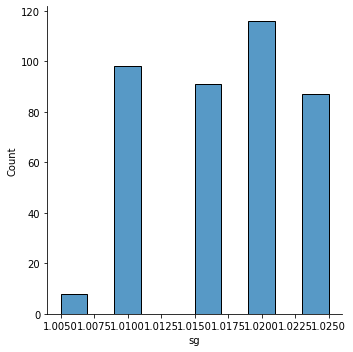

In [38]:
sns.displot(df['sg'])


In [45]:
sns.violinplot(y=df["classification"],x=df["sg"])


TypeError: No loop matching the specified signature and casting was found for ufunc add

Data visualisation

In [36]:
plt.matshow(df.corr())
plt.show()

ZeroDivisionError: division by zero

In [28]:
sns.heatmap(df,annot=True)



ValueError: could not convert string to float: 'normal'

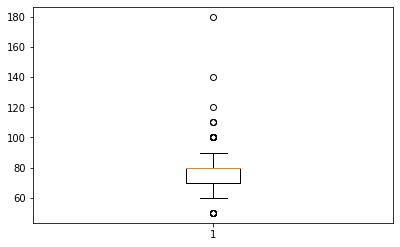

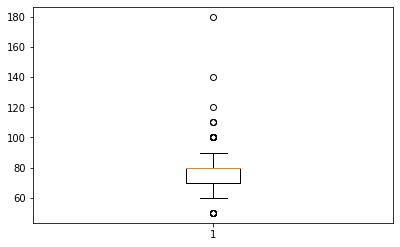

In [23]:
# data visualisation

fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()


fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()

In [ ]:
sns.barplot(x = 'who',
            y = 'fare',
            data = df)

In [24]:
# Split dataset into random train and test subsets:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(400, 24) (400,)
[[22.0 60.0 1.025 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  97.0 18.0 1.2 138.0 4.3 13.5 '42' '7900' '6.4' 'no' 'no' 'no' 'good'
  'no' 'no']
 [57.0 60.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  132.0 18.0 1.1 150.0 4.7 15.4 '42' '11000' '4.5' 'no' 'no' 'no' 'good'
  'no' 'no']
 [75.0 70.0 1.01 1.0 3.0 'normal' 'abnormal' 'notpresent' 'notpresent'
  123.0 31.0 1.4 130.0 4.0 12.5 '37' '9600' '4.1' 'no' 'yes' 'no' 'good'
  'no' 'no']
 [51.0 80.0 1.01 2.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  106.0 26.0 1.4 111.0 2.5 11.6 '35' '7300' '4.6' 'no' 'no' 'no' 'good'
  'no' 'no']
 [46.0 90.0 1.01 2.0 0.0 'normal' 'abnormal' 'notpresent' 'notpresent'
  99.0 80.0 2.1 136.0 4.2 11.1 '32' '9100' '4.1' 'yes' 'no' 'no' 'good'
  'no' 'no']]
['notckd' 'notckd' 'ckd' 'ckd' 'ckd']


In [25]:
# fit the model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'normal'